# Speech to text with Youtube and Twitter video's

Download a video from youtube and do S2T with it!
Mind you: this only works in practice for short (e.g. <1 minute) video's!

source: https://towardsdatascience.com/extracting-speech-from-video-using-python-f0ec7e312d38

### Contents
0. Install packages
1. Speech to text for Youtube Video's
2. Speech to text for Twitter Video's


## 0. Install packages

In [21]:
#download youtube video's
!pip3 install youtube_dl

In [22]:
#convert movie to wav
!pip3 install moviepy

In [26]:
!pip install translators --upgrade

  Using cached translators-5.4.2-py3-none-any.whl (29 kB)
  Using cached loguru-0.6.0-py3-none-any.whl (58 kB)


## 1. Speech to text for Youtube video's

In [1]:
video = input('Please provide the Youtube URL')

Please provide the Youtube URLhttps://www.youtube.com/watch?v=n2FKsPt83_A


In [2]:
video

'https://www.youtube.com/watch?v=n2FKsPt83_A'

In [3]:
#source: https://github.com/ytdl-org/youtube-dl#embedding-youtube-dl
from __future__ import unicode_literals
import youtube_dl

ydl_opts = {}
with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    ydl.download([video])

[youtube] n2FKsPt83_A: Downloading webpage
[download] Resuming download at byte 1305471
[download] Destination: Python Audio Processing Basics - How to work with audio files in Python-n2FKsPt83_A.mp4
[download]   3.4% of 65.31MiB at 84.21KiB/s ETA 12:47   

KeyboardInterrupt: 

In [ ]:
from glob import glob
mp4_files = glob('*.mp4')
mp4_files

In [10]:
from IPython.display import Video
Video("youtube-dl test video ''_ä↭𝕐-BaW_jenozKc.mp4")

In [12]:
#convert to wav file format for best result
import moviepy.editor as mp
clip = mp.VideoFileClip(r"youtube-dl test video ''_ä↭𝕐-BaW_jenozKc.mp4") 
 
clip.audio.write_audiofile(r"converted.wav")

MoviePy - Writing audio in converted.wav


MoviePy - Done.


In [6]:
#do the speech_recognition
import speech_recognition as sr 
r = sr.Recognizer()
audio = sr.AudioFile("converted.wav")
with audio as source:
  audio_file = r.record(source)
result = r.recognize_google(audio_file)
result

KeyboardInterrupt: 

## 2. As above but now for twitter video's

Some provided examples are here:
- https://twitter.com/g900ap/status/1554442430673469441

In [5]:
tweet = input("please provide the URL of the tweet:")

please provide the URL of the tweet:https://twitter.com/g900ap/status/1554442430673469441


In [6]:
tweet

'https://twitter.com/g900ap/status/1554442430673469441'

In [7]:
from __future__ import unicode_literals
import youtube_dl

ydl_opts = {}
with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    ydl.download(['https://twitter.com/g900ap/status/1554442430673469441']) #drunk russian soldier https://twitter.com/visegrad24/status/1541178599918673927
    #https://twitter.com/nexta_tv/status/1541480740180860928

[twitter] 1554442430673469441: Downloading guest token
[twitter] 1554442430673469441: Downloading JSON metadata
[twitter] 1554442430673469441: Downloading m3u8 information


ERROR: unable to open for writing: [Errno 2] No such file or directory: 'Robert van der Noordaa - Opslag en bevoorradingscentrum van de Russen in Brilevka (Kherson) opgeblazen. Volgens de rapporten 80 Russische soldaten omgekomen en 200 gewonden. Werd met HIMARS gedaan-1554442430673469441.mp4.part'


DownloadError: ERROR: unable to open for writing: [Errno 2] No such file or directory: 'Robert van der Noordaa - Opslag en bevoorradingscentrum van de Russen in Brilevka (Kherson) opgeblazen. Volgens de rapporten 80 Russische soldaten omgekomen en 200 gewonden. Werd met HIMARS gedaan-1554442430673469441.mp4.part'

In [8]:
from glob import glob
mp4_files = glob('*.mp4')
mp4_files

["NEXTA - 'Rescuers are trying to get survivors from under the rubble of the collapsed roof of the shopping center,' Anton Gerashchenko reports from the scene.-1541480740180860928.mp4",
 'output.mp4',
 'sample.mp4',
 'Street - 22516.mp4',
 'Visegrád 24 - Ukrainian man finds a drunk Russian soldier.  Via @WarNewsPL1-1541178599918673927.mp4',
 "youtube-dl test video ''_ä↭𝕐-BaW_jenozKc.mp4"]

In [13]:
from IPython.display import Video
Video("NEXTA - 'Rescuers are trying to get survivors from under the rubble of the collapsed roof of the shopping center,' Anton Gerashchenko reports from the scene.-1541480740180860928.mp4")

In [12]:
#convert to wav file format for best result
import moviepy.editor as mp
clip = mp.VideoFileClip(r"NEXTA - 'Rescuers are trying to get survivors from under the rubble of the collapsed roof of the shopping center,' Anton Gerashchenko reports from the scene.-1541480740180860928.mp4") 
 
clip.audio.write_audiofile(r"converted.wav")

MoviePy - Writing audio in converted.wav


MoviePy - Done.


In [16]:
import IPython
IPython.display.Audio('Converted.wav')

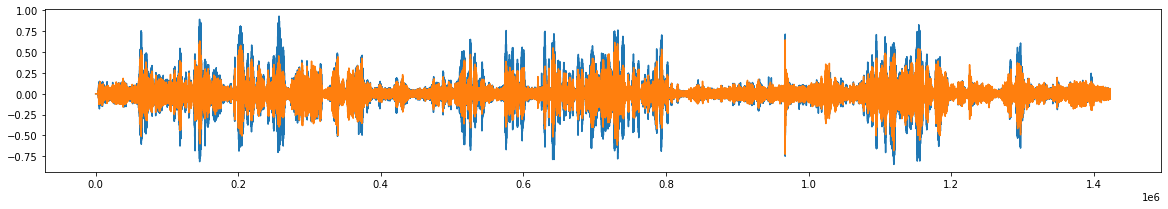

In [29]:
import soundfile as sf
data, rate = sf.read('Converted.wav')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

In [19]:
#do the speech_recognition
import speech_recognition as sr 
r = sr.Recognizer()
audio = sr.AudioFile("converted.wav")
with audio as source:
  audio_file = r.record(source)
result = r.recognize_google(audio_file, language='uk')
result

'Я щас внутри супермаркета спасатели питайся найти использовала Рухнувшие крише не работает для того чтоб прописаться спасти хотьково той який Стариков просто прийшов покупать продукти'

In [27]:
#translating it to English
import translators as ts
print(ts.google(result)) # default: from_language='auto', to_language='en'

Using state South Holland server backend.


Right now, inside the supermarket, rescuers Find I used to use the collapsed Krisha does not work to register to save at all that Yaki old people just Priishov buy products
